In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kisho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kisho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Load the dataset
data = pd.read_csv('E:/python/reviews_0-250.csv')

C:\Users\kisho\AppData\Local\Temp\ipykernel_19148\3859855981.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('E:/python/reviews_0-250.csv')


In [11]:
# Extract required columns
data = data[['rating', 'review_text']].head(10000)

In [12]:
# Drop rows with missing values
data.dropna(inplace=True)

In [13]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [14]:
data['review_text'] = data['review_text'].apply(preprocess_text)

C:\Users\kisho\AppData\Local\Temp\ipykernel_19148\3056899401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='Set1')


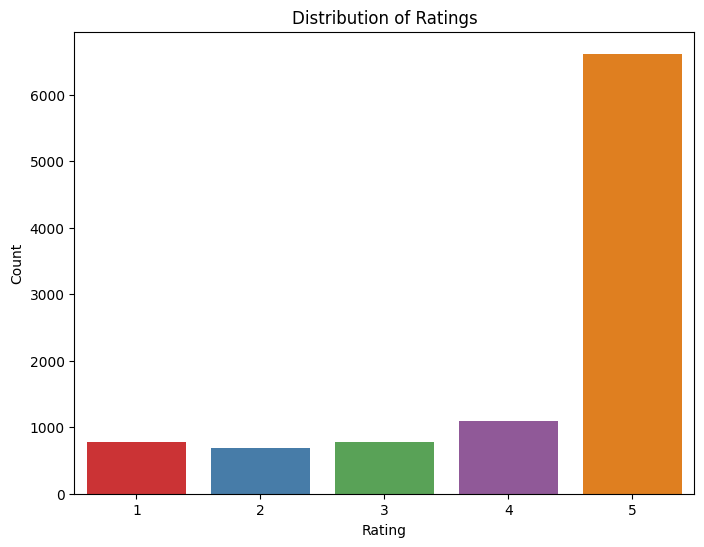

In [15]:
# Visualize distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=data, palette='Set1')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_text'], data['rating'], test_size=0.2, random_state=42)


In [17]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [18]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [19]:
# Predictions
y_pred_train = clf.predict(X_train_tfidf)
y_pred_test = clf.predict(X_test_tfidf)

In [20]:
# Model evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6716943187531422
Testing Accuracy: 0.6733668341708543


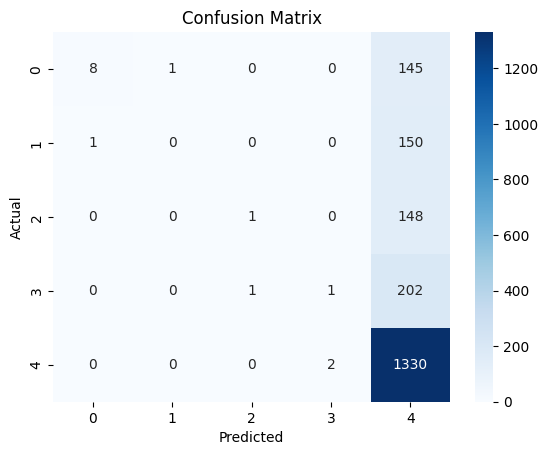

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.05      0.10       154
           2       0.00      0.00      0.00       151
           3       0.50      0.01      0.01       149
           4       0.33      0.00      0.01       204
           5       0.67      1.00      0.80      1332

    accuracy                           0.67      1990
   macro avg       0.48      0.21      0.19      1990
weighted avg       0.59      0.67      0.55      1990

